<a href="https://colab.research.google.com/github/Diya-Amith/Data-Science-Project-Galaxy-Morphology-Classification-Using-Deep-Learning-and-Explainable-AI-/blob/main/galaxycode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.0 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import random
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your Google Drive folder
zip_file_path_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1.zip'
zip_file_path_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.zip'

# Folder where you want to extract the contents
extract_folder_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1'
extract_folder_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1'

# Unzipping the files
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_1)

with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_2)

In [3]:

train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1/training_solutions_rev1.csv"



## **Preprocessing**

### **Labels**

In [4]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [5]:
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
labels_df.shape

(61578, 38)

In [7]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [9]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **Images**

In [11]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [11]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,image_path
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [12]:
def refine_classification(row):
    if row['Class1.2'] >= 0.7 and row['Class4.1'] >= 0.7:
        return 'Spiral'
    elif row['Class1.1'] >= 0.75:
        return 'Elliptical'
    elif row['Class1.2'] >= 0.55 and row['Class4.2'] >= 0.55:
        return 'Lenticular'
    elif row['Class6.1'] >= 0.55 or row['Class8.1'] >= 0.55 or row['Class8.2'] >= 0.55 or \
         row['Class8.3'] >= 0.55 or row['Class8.5'] >= 0.55 or row['Class8.6'] >= 0.55 or row['Class8.7'] >= 0.7:
        return 'Peculiar'

    else:
        return 'Unclear'

# Apply the refine_classification function to classify galaxies
filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

# Check the distribution of galaxy types again
print(filtered_labels_df['Galaxy_Type'].value_counts())



Galaxy_Type
Unclear       35785
Elliptical    11178
Spiral         6513
Peculiar       4641
Lenticular     3461
Name: count, dtype: int64


In [13]:
# Filter the DataFrame to include only the rows with the desired Galaxy Types
galaxy_types_of_interest = ['Unclear', 'Elliptical', 'Spiral', 'Peculiar', 'Transitional', 'Lenticular']

# Create a new DataFrame with the columns: GalaxyID, image_path, and Galaxy_Type
new_galaxy_df = filtered_labels_df[filtered_labels_df['Galaxy_Type'].isin(galaxy_types_of_interest)][['GalaxyID', 'image_path', 'Galaxy_Type']]

# Check the new DataFrame
print(new_galaxy_df.head())

   GalaxyID  image_path Galaxy_Type
0    100008  100008.jpg     Unclear
1    100023  100023.jpg     Unclear
2    100053  100053.jpg  Elliptical
3    100078  100078.jpg     Unclear
4    100090  100090.jpg  Elliptical


In [14]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 61578


In [15]:
# Apply Label Encoding to the class column in balanced_data
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

# Check the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# Check the updated balanced_data DataFrame
print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Lenticular': 1, 'Peculiar': 2, 'Spiral': 3, 'Unclear': 4}
Balanced DataFrame with Encoded Classes:
   GalaxyID  image_path Galaxy_Type  class_encoded
0    100008  100008.jpg     Unclear              4
1    100023  100023.jpg     Unclear              4
2    100053  100053.jpg  Elliptical              0
3    100078  100078.jpg     Unclear              4
4    100090  100090.jpg  Elliptical              0


## **EDA**

Image size for 100008.jpg: (424, 424)


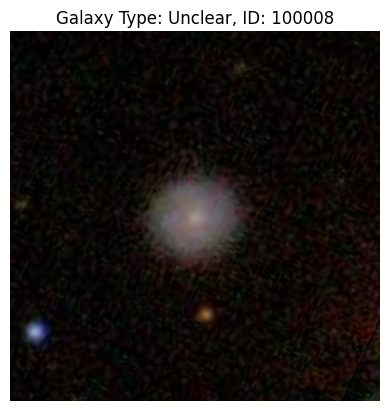

In [20]:
image_filename = new_galaxy_df.iloc[0]['image_path']  # Change index as needed
image_path = os.path.join(train_images_path, image_filename)

# Check image size
image = Image.open(image_path)
print(f"Image size for {image_filename}: {image.size}")

# Display a random image from the folder
random_image_filename = random.choice(new_galaxy_df['image_path'])  # Get a random image filename
random_image_path = os.path.join(train_images_path, random_image_filename)  # Construct the full path
random_image = Image.open(random_image_path)  # Open the image

plt.imshow(random_image)
plt.title(f"Galaxy Type: {new_galaxy_df.iloc[0]['Galaxy_Type']}, ID: {new_galaxy_df.iloc[0]['GalaxyID']}")
plt.axis('off')
plt.show()

## **Data Splitting**

In [28]:
# Create an empty list to store the selected images
limited_data = []

# Loop through each class and select up to 3000 images
for class_label in new_galaxy_df['class_encoded'].unique():
    # Filter images belonging to the class
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    # If class has more than 3000 images, take the first 3000, otherwise take all
    class_data_limited = class_data.head(1000)
    limited_data.append(class_data_limited)

# Concatenate all selected images into a new DataFrame
limited_df = pd.concat(limited_data)


In [29]:
# Check the distribution of classes in the limited_df
class_distribution = limited_df['class_encoded'].value_counts()

# Print the class distribution
print("Class Distribution in Limited DataFrame:")
print(class_distribution)


Class Distribution in Limited DataFrame:
class_encoded
4    1000
0    1000
2    1000
3    1000
1    1000
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

# Assuming you have your dataset in new_galaxy_df with a column 'class_encoded' representing the labels

# Split the dataset into training and validation sets using stratified sampling
X = limited_df['image_path']  # Features (image paths or any other feature)
y = limited_df['class_encoded']  # Labels (encoded galaxy types)

# Perform the split, ensuring stratification based on the 'class_encoded' column
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine the X_train and y_train into a new dataframe for the training set
train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})

# Combine the X_val and y_val into a new dataframe for the validation set
val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

# Check the distribution of classes in the training and validation sets
print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())


Training Set Class Distribution:
class_encoded
1    800
4    800
3    800
0    800
2    800
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
1    200
3    200
0    200
2    200
4    200
Name: count, dtype: int64


## **Augmentation**

In [31]:
# Set up image generators for data augmentation and resizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduce transformation range
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Convert the class_encoded column to string type
train_df['class_encoded'] = train_df['class_encoded'].astype(str)
val_df['class_encoded'] = val_df['class_encoded'].astype(str)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'  # Since class labels are now strings
)

# Validation Generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_images_path,
    x_col='image_path',
    y_col='class_encoded',  # Class labels as strings
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=64,
    class_mode='categorical'
)

Found 4000 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.


## **Model 1: VGG16**

### **Initialisation**

In [32]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the base model layers to retain pre-trained weights initially
for layer in base_model.layers:
    layer.trainable = False

# Custom model on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Adjust the number of classes as per your dataset
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Small learning rate for fine-tuning
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 27562821 (105.14 MB)
Trainable params: 12848133 (49.01 MB)
Non-trainable params: 14714688 (56.13 MB)
______

### **Training**

In [33]:
# Ensure correct class weights computation
train_classes = train_df['class_encoded'].astype(int).values
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_classes),
    y=train_classes
)
class_weight_dict = dict(enumerate(class_weights))

# Add ModelCheckpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')

]


In [38]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increase epochs for better convergence
    callbacks=callbacks,
    class_weight=class_weight_dict
)

Epoch 1/10
 2/63 [..............................] - ETA: 1:25 - loss: 1.4496 - accuracy: 0.3906

KeyboardInterrupt: 

## **Model 2: RESNET50**

### **Initialisation**

In [25]:
# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model initially
for layer in base_model.layers:
    layer.trainable = False

# Define the custom model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Efficient pooling for ResNet50
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Adjust the number of classes
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Use a small learning rate for transfer learning
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 10516

### **Training**

In [27]:
# Callbacks for optimization
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_resnet50.keras', monitor='val_loss', save_best_only=True)
]

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks,
    class_weight=class_weight_dict  # Use class weights
)


Epoch 1/10
21/32 [==================>...........] - ETA: 2:35 - loss: 1.8279 - accuracy: 0.2037

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

NameError: name 'model' is not defined

## **Model3: Mobilenet v2**

In [39]:
# Load EfficientNetB0 model without the top layer
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model initially
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dropout(0.5),              # Dropout for regularization
    layers.Dense(512, activation="relu"),  # Dense layer for learning
    layers.Dropout(0.5),
    layers.Dense(5, activation="softmax")  # Adjust the number of output classes
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                       

In [40]:
# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Callbacks for optimization
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("efficientnetb0_model.keras", save_best_only=True, monitor="val_loss")


In [42]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Adjust as needed
    callbacks=[early_stopping, checkpoint],
    class_weight=class_weight_dict
)


Epoch 1/30
48/63 [=====================>........] - ETA: 18s - loss: 1.6609 - accuracy: 0.2039

KeyboardInterrupt: 

## **Model 4: Custom Build Model 2:**

### **Initialisation**

In [29]:
# Define the custom CNN model
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=5):
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Adjust number of classes

    return model

# Build the model
input_shape = (224, 224, 3)  # Input shape for the images
num_classes = 5  # Number of galaxy morphology classes
model = build_custom_cnn(input_shape=input_shape, num_classes=num_classes)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

### **Training**

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='custom_cnn.keras', save_best_only=True, monitor='val_loss')
# Train the model
history = model.fit(
    train_generator,  # Your training data generator
    validation_data=val_generator,  # Your validation data generator
    epochs=30,  # Adjust the number of epochs as needed
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/125 ━━━━━━━━━━━━━━━━━━━━ 37:29 20s/step - accuracy: 0.1757 - loss: 1.6407

## **Model 5: Ensemble Model**